# Drive & Environment Setup

In [1]:
IN_COLAB = False

try:
  import google.colab
  IN_COLAB = True
except:
  pass

if IN_COLAB == True:
  from google.colab import drive
  drive.mount('/content/gdrive')
  %cd /content/gdrive/MyDrive/Tesi_GDrive
  PROJECT_PATH = '/content/gdrive/MyDrive/Tesi_GDrive'
  #!ls
else:
  %cd /Users/edoardorossi/Documents/Universita/Tesi/Tesi_GDrive
  PROJECT_PATH = '/Users/edoardorossi/Documents/Universita/Tesi/Tesi_GDrive'

import warnings
import pickle
import sys
import os

if IN_COLAB == True:
  sys.path.insert(0, os.path.abspath('functions'))
  sys.path.insert(0, os.path.abspath(''))
else:
  sys.path.insert(0, os.path.abspath('functions'))
  sys.path.insert(0, os.path.abspath(''))

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, silhouette_samples
from keras.models import Sequential, Model
from keras.layers import Dense, Lambda
from keras.layers import Activation
from keras.activations import exponential, relu
from keras import backend as K
import tensorflow as tf
#from tensorflow.keras.layers import Input, Layer, InputSpec, Reshape
#from tensorflow.keras import initializers
#from tensorflow.keras.optimizers import Adam
tf.config.run_functions_eagerly(True)
from scipy.optimize import minimize, differential_evolution

from pkl import store_data, load_data
#from functions.compressor import compress
from functions.compressor_param import compress_2
from functions.mapping import ind2sub, sub2ind3d
from functions.clustering_foo import K_Medoids

import random
from collections import defaultdict

import time

print("Libraries imported")

/Users/edoardorossi/Documents/Universita/Tesi/Tesi_GDrive


2023-05-27 00:12:07.815701: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Libraries imported


# Data Import

In [2]:
cta30_def_path = os.path.join(PROJECT_PATH, 'CTA30/DF_clean/clean_CTA_30_def.csv')  
df_def = pd.read_csv(cta30_def_path)


cta30_18_path = os.path.join(PROJECT_PATH, 'CTA30/DF_clean/clean_CTA_30_2018.csv')
cta30_19_path = os.path.join(PROJECT_PATH, 'CTA30/DF_clean/clean_CTA_30_2019.csv')
cta30_20_path = os.path.join(PROJECT_PATH, 'CTA30/DF_clean/clean_CTA_30_2020.csv')
cta30_21_path = os.path.join(PROJECT_PATH, 'CTA30/DF_clean/clean_CTA_30_2021.csv')
cta30_22_path = os.path.join(PROJECT_PATH, 'CTA30/DF_clean/clean_CTA_30_2022.csv')

df18= pd.read_csv(cta30_18_path)
df19= pd.read_csv(cta30_19_path)
df20= pd.read_csv(cta30_20_path)
df21= pd.read_csv(cta30_21_path)
df22= pd.read_csv(cta30_22_path)

df = pd.concat([df18, df19, df20, df21, df22], ignore_index=True)

[r,c] = df.shape
print("The dataset has", r, "rows and", c, "columns")

The dataset has 2176378 rows and 76 columns


# Data Preprocessing - "Compression"

## Normalization

In [3]:
scale_norm = MinMaxScaler()
df_norm = pd.DataFrame(scale_norm.fit_transform(df), columns=df.columns)

## Standardization

In [4]:
st_scale = StandardScaler()
df_st = pd.DataFrame(st_scale.fit_transform(df), columns=df.columns)

# Data Preprocessing - "Clustering"

## K-Means

In [5]:
def K_Means_elbow_best_model(df,k_max):

    X = df.values

    n_clusters_range = range(2,k_max+1)

    wcss = []

    for n_clusters in n_clusters_range:
        
        time_start = time.time()
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
        time_elapsed = time.time() - time_start
        print("KMeans with", n_clusters, "clusters computed in", time_elapsed, "seconds")

    plt.plot(n_clusters_range, wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    


KMeans with 2 clusters computed in 16.08219027519226 seconds
KMeans with 3 clusters computed in 18.598392963409424 seconds
KMeans with 4 clusters computed in 23.79142999649048 seconds
KMeans with 5 clusters computed in 25.683462858200073 seconds
KMeans with 6 clusters computed in 28.195502042770386 seconds
KMeans with 7 clusters computed in 34.12229609489441 seconds
KMeans with 8 clusters computed in 38.48144292831421 seconds
KMeans with 9 clusters computed in 48.862473249435425 seconds
KMeans with 10 clusters computed in 52.55023217201233 seconds
KMeans with 11 clusters computed in 64.04083704948425 seconds
KMeans with 12 clusters computed in 61.735074043273926 seconds
KMeans with 13 clusters computed in 72.71081709861755 seconds
KMeans with 14 clusters computed in 69.12551712989807 seconds
KMeans with 15 clusters computed in 80.96456003189087 seconds
KMeans with 16 clusters computed in 75.29241299629211 seconds
KMeans with 17 clusters computed in 92.11728525161743 seconds
KMeans with

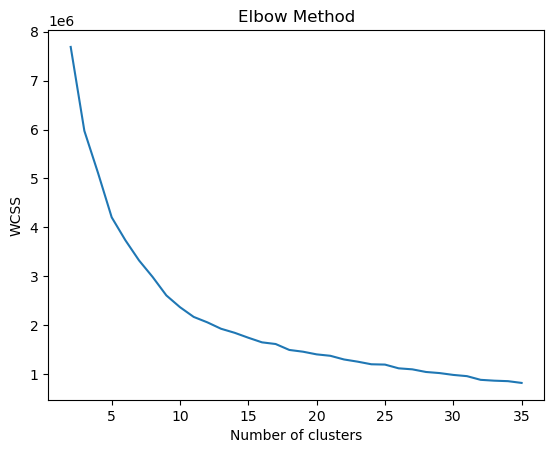

KMeans with 2 clusters computed in 31.46563220024109 seconds
KMeans with 3 clusters computed in 40.596067667007446 seconds
KMeans with 4 clusters computed in 40.61411094665527 seconds
KMeans with 5 clusters computed in 53.01831293106079 seconds
KMeans with 6 clusters computed in 43.82501006126404 seconds
KMeans with 7 clusters computed in 49.12114095687866 seconds
KMeans with 8 clusters computed in 53.98811483383179 seconds
KMeans with 9 clusters computed in 67.90017914772034 seconds
KMeans with 10 clusters computed in 80.25977087020874 seconds
KMeans with 11 clusters computed in 88.77747988700867 seconds
KMeans with 12 clusters computed in 93.99426198005676 seconds
KMeans with 13 clusters computed in 98.15826296806335 seconds
KMeans with 14 clusters computed in 155.24226570129395 seconds
KMeans with 15 clusters computed in 140.19857001304626 seconds
KMeans with 16 clusters computed in 129.28430485725403 seconds
KMeans with 17 clusters computed in 106.52348494529724 seconds
KMeans with

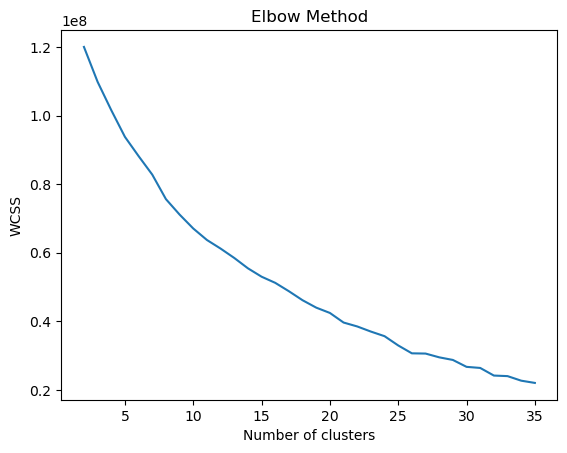

In [9]:
#k_max = 35
#K_Means_elbow_best_model(df_norm, k_max)
#K_Means_elbow_best_model(df_st, k_max)


In [9]:
def K_Means_silhouette_best_model(df, k_max):

    X = df.values

    n_clusters_range = range(2, k_max+1)

    silhouettes_score = []
    models = []

    for n_clusters in n_clusters_range:
        time_start = time.time()

        fig, ax = plt.subplots(figsize=(8, 6))

        kmeans = KMeans(n_clusters=n_clusters)

        labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)

        silhouettes_score.append(silhouette_avg)
        models.append(kmeans)

        sample_silhouette_values = silhouette_samples(X, labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
            
        ax.set_title("Silhouette plot for {} clusters".format(n_clusters))
        ax.set_xlabel("Silhouette coefficient values")
        ax.set_ylabel("Cluster labels")

        # The vertical line for average silhouette score of all the values
        ax.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax.set_yticks([])  # Clear the yaxis labels / ticks
        ax.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.show()

        print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
        time_elapsed = time.time() - time_start
        print("Cluster", i, "computed in", time_elapsed, "seconds")

    best_model_idx = np.argmax(silhouettes_score)
    best_n_clusters = n_clusters_range[best_model_idx]
    print("Best model has", best_n_clusters, "clusters")





KeyboardInterrupt: 

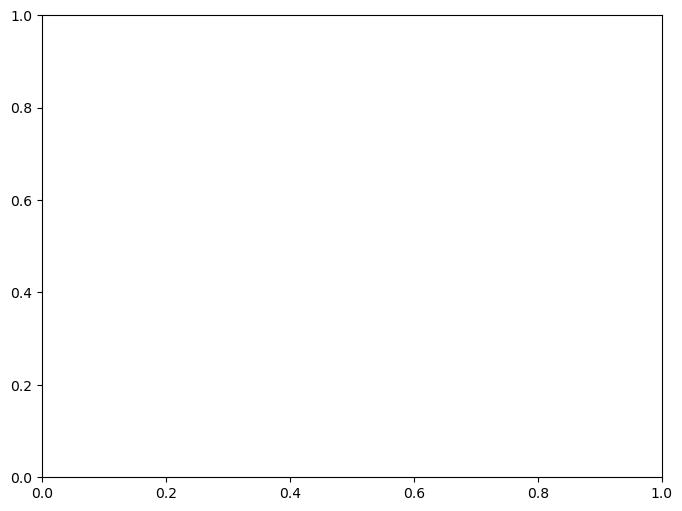

In [10]:
st_kmeans_return = K_Means_silhouette_best_model(df_st, 3)
norm_kmeans_return = K_Means_silhouette_best_model(df_norm, 3)

## K-Medioids

In [5]:
from functions.clustering_foo import K_Medoids

models = K_Medoids(df_norm, 3)

: 

: 

In [ ]:
models

## Agglomerative

## Gaussian Mixture